In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/laptop_details.csv')
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [5]:
#Checking for Null Values

df.isnull().sum()

#There are 139 null values with ratings. Since it is a Float datatype we could use Mean or Median to fill the null values. Since the ratings are not a deciding factor for pricing it is dropped.

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

In [6]:
#Dropping "Rating" feature 

df.drop ('Rating', axis = 1, inplace = True)
df.head()

,Product,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [7]:
#Checking for Duplicate Values

df.duplicated().sum()

299

In [8]:
#Dropping Duplicates 
df = df.drop_duplicates()
df.duplicated().sum()

0

**FEATURE ENGINEERING AND FEATURE SELECTION**

In [9]:
# Converting MRP to Float
df.MRP = df.MRP.str.replace('₹','').str.replace(',','')
df.MRP = df.MRP.astype(float)

In [10]:
df.head()

,Product,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 719
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  421 non-null    object 
 1   MRP      421 non-null    float64
 2   Feature  421 non-null    object 
dtypes: float64(1), object(2)
memory usage: 13.2+ KB


**FEATURE EXTRACTION**

In [12]:
import re

In [13]:
# New column Brand
# str.split() by space

df['Brand'] = df['Product'].apply(lambda x: x.split(" ")[0])

In [14]:
df.head()

,Product,MRP,Feature,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS


In [15]:
df.Brand.unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

In [16]:
#RAM_SIZE

df['RAM_Size'] = df['Feature'].apply(lambda x: int(re.findall(r'\d+', x.split('DDR')[0])[-1]))

In [17]:
#RAM_TYPE

regex_ram_type = r'(DDR[0-9L]*|LPDDR[0-9X]*)'

def extract_ram_type(text):
    match = re.search(regex_ram_type, text, re.IGNORECASE)
    if match:
        return match.group(0)
    else:
        return None

df['RAM_Type'] = df['Feature'].apply(extract_ram_type)

In [18]:
#STORAGE

df['Storage'] = df['Feature'].apply(lambda x: int(re.findall(r'\d+', x.split('SSD')[0])[-1]))

In [19]:
#DISK TYPE

df['Disk_Type'] = df['Product'].apply(lambda x:'HDD' if 'HDD' in x else 'SSD' )

In [20]:
df.head()

,Product,MRP,Feature,Brand,RAM_Size,RAM_Type,Storage,Disk_Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8,DDR4,256,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8,DDR4,512,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8,DDR4,512,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,8,DDR4,512,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8,DDR4,512,SSD


In [21]:
df['OS_Type'] = df['Feature'].apply(lambda x: 'Windows' if 'Windows' in x else'Mac OS' if 'Mac OS' in x else 'Others')

df.head()

,Product,MRP,Feature,Brand,RAM_Size,RAM_Type,Storage,Disk_Type,OS_Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8,DDR4,256,SSD,Windows
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8,DDR4,512,SSD,Windows
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8,DDR4,512,SSD,Windows
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,8,DDR4,512,SSD,Windows
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8,DDR4,512,SSD,Windows


In [22]:
regex_processor = r'(?:Intel|AMD)\s+[A-Za-z\d]+'

def extract_processor(text):
    match = re.search(regex_processor, text, re.IGNORECASE)
    if match:
        return match.group()
    else:
        return None

df['Processor'] = df['Feature'].apply(extract_processor)

In [23]:
def extract_processor_brand(text):
    if re.search(r"intel", text, re.IGNORECASE):
        return "Intel"
    elif re.search(r"amd", text, re.IGNORECASE):
        return "AMD"
    else:
        return "Others"


df['Processor'] = df['Feature'].apply(extract_processor_brand)
df['Processor'].value_counts()

Intel     272
AMD       129
Others     20
Name: Processor, dtype: int64

In [24]:
df.Processor.unique()

array(['Intel', 'AMD', 'Others'], dtype=object)

In [25]:
df.head()

,Product,MRP,Feature,Brand,RAM_Size,RAM_Type,Storage,Disk_Type,OS_Type,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8,DDR4,256,SSD,Windows,Intel
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8,DDR4,512,SSD,Windows,Intel
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8,DDR4,512,SSD,Windows,Intel
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,8,DDR4,512,SSD,Windows,AMD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8,DDR4,512,SSD,Windows,Intel


In [26]:
#All the necessary features needed for the Analysis have been extracted. Lets Proceed with the EDA.

**EDA**

In [27]:
#RE-Arranging the Columns

df_1 = df[['Brand', 'Processor', 'RAM_Type', 'RAM_Size', 'Storage','Disk_Type', 'OS_Type', 'MRP']]
df_1.head()

,Brand,Processor,RAM_Type,RAM_Size,Storage,Disk_Type,OS_Type,MRP
0,Lenovo,Intel,DDR4,8,256,SSD,Windows,36990.0
1,Lenovo,Intel,DDR4,8,512,SSD,Windows,39990.0
2,ASUS,Intel,DDR4,8,512,SSD,Windows,32990.0
3,HP,AMD,DDR4,8,512,SSD,Windows,49990.0
4,ASUS,Intel,DDR4,8,512,SSD,Windows,49990.0


In [28]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 719
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      421 non-null    object 
 1   Processor  421 non-null    object 
 2   RAM_Type   409 non-null    object 
 3   RAM_Size   421 non-null    int64  
 4   Storage    421 non-null    int64  
 5   Disk_Type  421 non-null    object 
 6   OS_Type    421 non-null    object 
 7   MRP        421 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 29.6+ KB


In [29]:
#UNIVARAITE ANALYSIS FOR NUMERICAL COLUMNS (MRP)

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


<Axes: xlabel='MRP', ylabel='Density'>

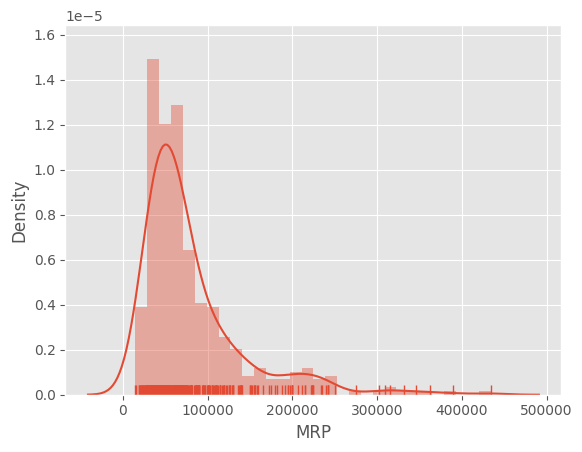

In [30]:
sns.distplot(df_1['MRP'],rug=True)

#From the Distribution plot, Most laptops in the dataset are priced between the range of 50K to 60K Rupees.

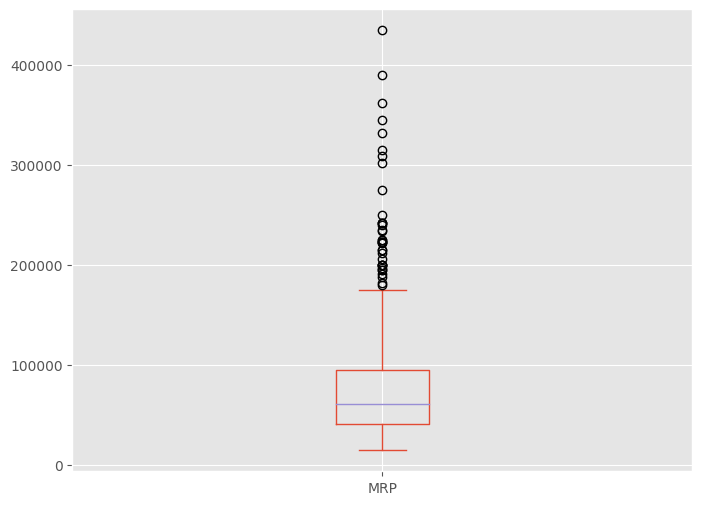

In [31]:
df_1.MRP.plot(kind = 'box', figsize = (8,6))
plt.show()

#There are a lot of Outliers present in the data.

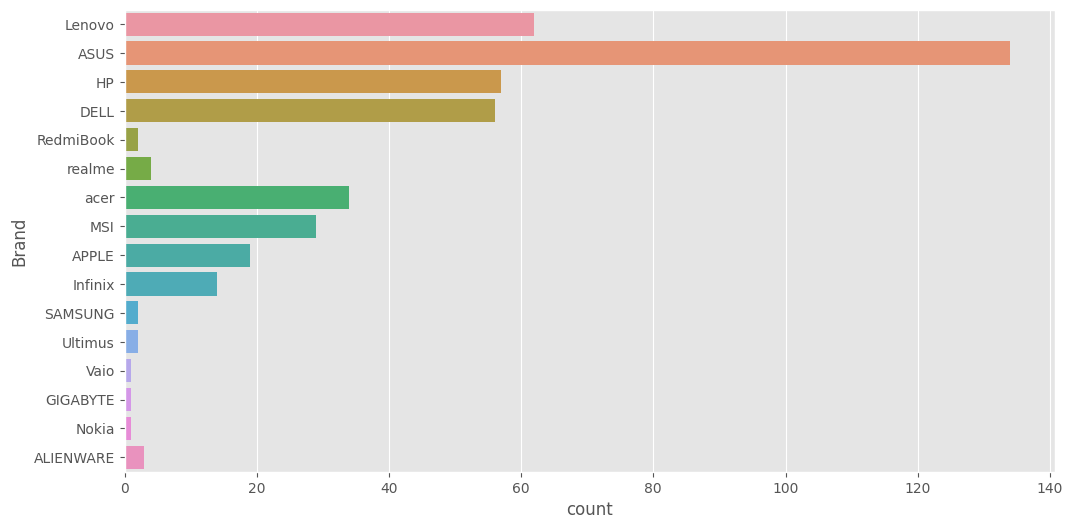

In [32]:
# UNIVARIATE ANALYSIS FOR CATEGORICAL COLUMNS (BRAND)

plt.figure(figsize = (12,6), dpi = 100)
sns.countplot(y = 'Brand', data = df_1)
plt.yticks(fontsize= 10)
plt.xticks(fontsize= 10)
style.use ('ggplot')

#ASUS Laptop have more configurations and models compared to any other laptops in the provided Dataset

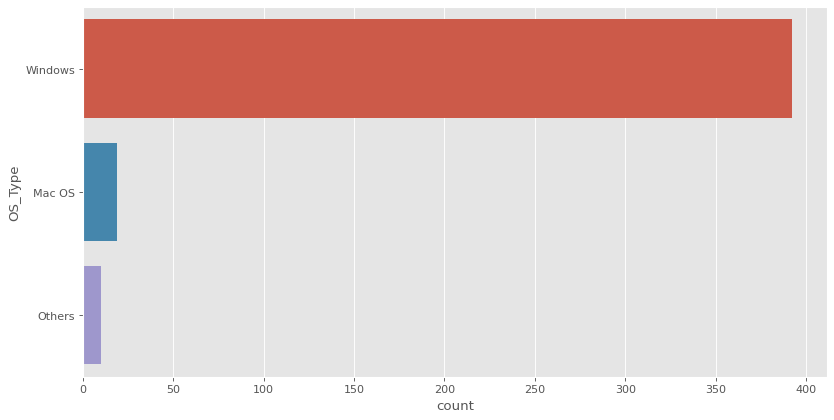

In [33]:
# UNIVARIATE ANALYSIS FOR CATEGORICAL COLUMNS (OS_Type)

plt.figure(figsize = (12,6), dpi = 80)
sns.countplot(y = 'OS_Type', data = df_1)
plt.yticks(fontsize= 10)
plt.xticks(fontsize= 10)
style.use ('ggplot')

#It is obvious that the number of Apple laptops is only closer to 20. Therefore Windows OS is more compared to the Mac OS.

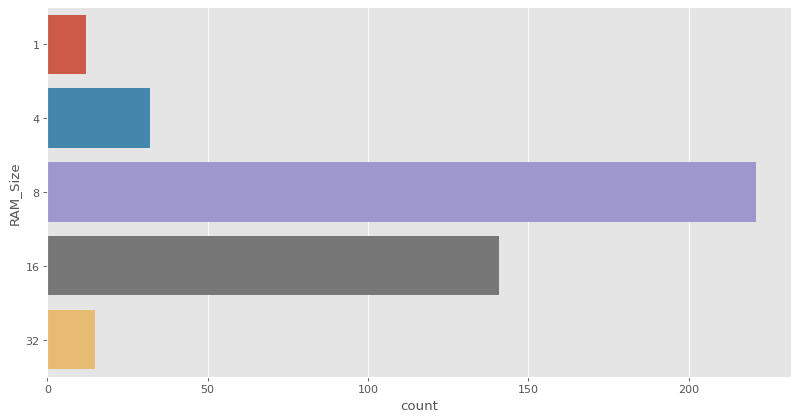

In [34]:
# UNIVARIATE ANALYSIS FOR CATEGORICAL COLUMNS (OS_Type)

plt.figure(figsize = (12,6), dpi = 80)
sns.countplot(y = 'RAM_Size', data = df_1)
plt.yticks(fontsize= 10)
plt.xticks(fontsize= 10)
style.use ('ggplot')

#8 GB RAM Size is most popular among configurations

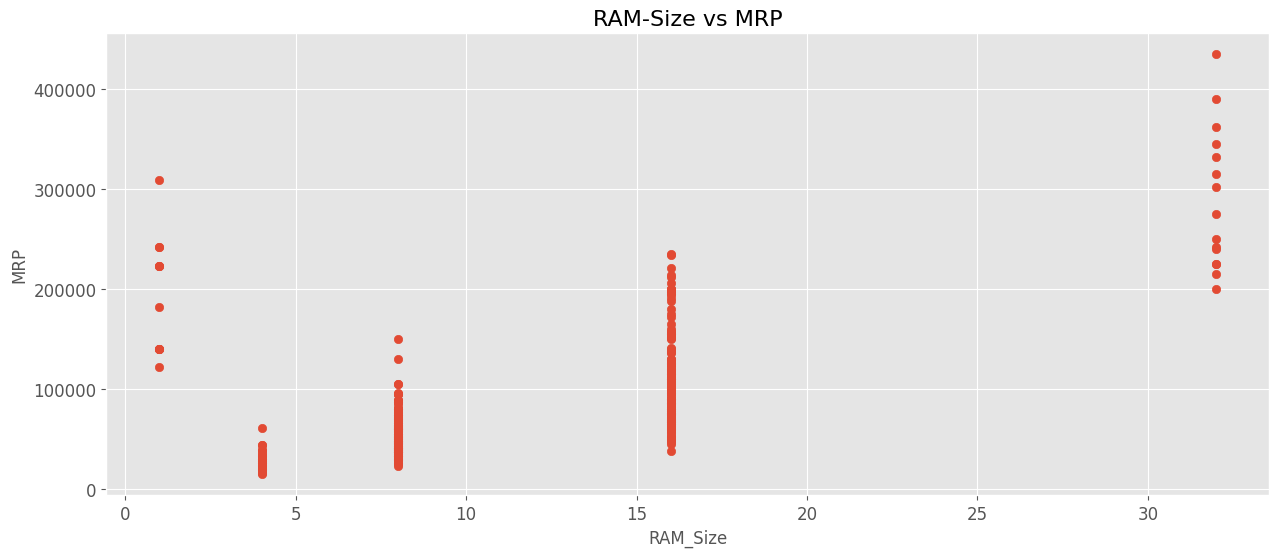

In [35]:
# Bi-Variate Analysis (Price vs RAM-Size)

fig = plt.figure(figsize = (15, 6))
plt.scatter(df_1.RAM_Size, df_1.MRP)

plt.title('RAM-Size vs MRP', fontsize=16)
plt.xlabel("RAM_Size")
plt.ylabel("MRP")
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()


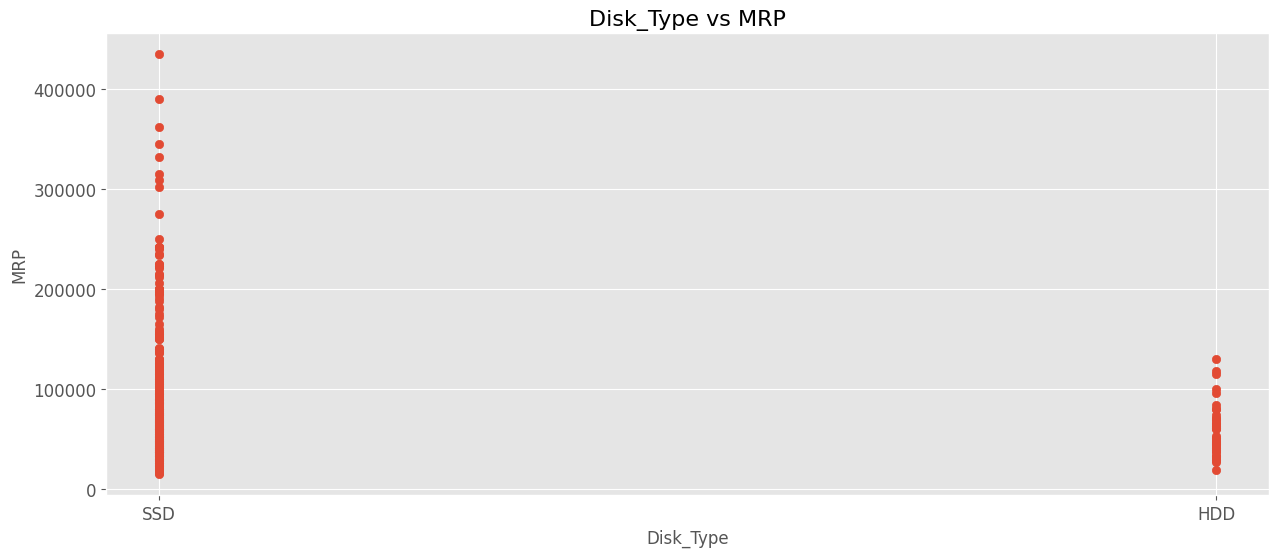

In [36]:
# Bi-Variate Analysis (Price vs Disk_Type)

fig = plt.figure(figsize = (15, 6))
plt.scatter(df_1.Disk_Type, df_1.MRP)

plt.title('Disk_Type vs MRP', fontsize=16)
plt.xlabel("Disk_Type")
plt.ylabel("MRP")
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()

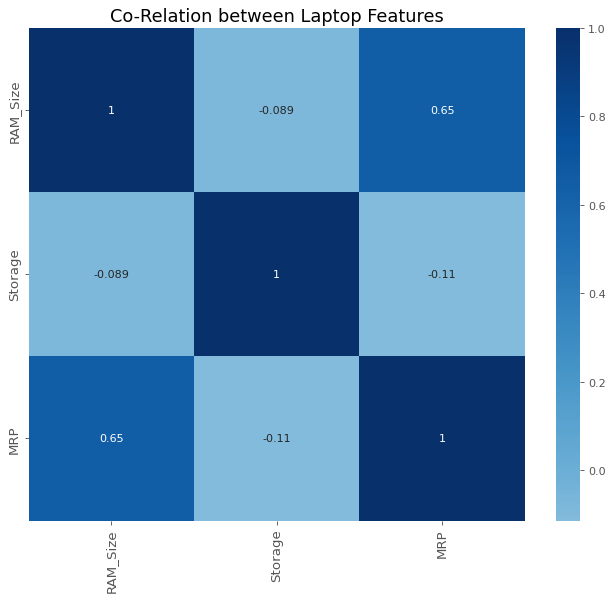

In [37]:
#Understanding the Co-relation betweet Price and Numerical Features using a HeatMap

plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(df_1.corr(), cmap='Blues', center=0, annot=True)

plt.title('Co-Relation between Laptop Features', fontsize=16)
plt.xticks(fontsize= 12, rotation = 90)
plt.yticks(fontsize= 12)
plt.show()

#Based on the graph, RAM_Size has 65% Impact on the Laptop Pricing.

**MODEL BUILDING**

In [38]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 719
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      421 non-null    object 
 1   Processor  421 non-null    object 
 2   RAM_Type   409 non-null    object 
 3   RAM_Size   421 non-null    int64  
 4   Storage    421 non-null    int64  
 5   Disk_Type  421 non-null    object 
 6   OS_Type    421 non-null    object 
 7   MRP        421 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 29.6+ KB


In [39]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
df_1[["Brand", "Processor","RAM_Type", "Disk_Type", "OS_Type"]] = enc.fit_transform(df_1[["Brand", "Processor","RAM_Type", "Disk_Type", "OS_Type"]])
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 719
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      421 non-null    float64
 1   Processor  421 non-null    float64
 2   RAM_Type   421 non-null    float64
 3   RAM_Size   421 non-null    int64  
 4   Storage    421 non-null    int64  
 5   Disk_Type  421 non-null    float64
 6   OS_Type    421 non-null    float64
 7   MRP        421 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 29.6 KB


**TRAIN_TEST SPLIT**

In [58]:
df.iloc[:, :-1]

,Product,MRP,Feature,Brand,RAM_Size,RAM_Type,Storage,Disk_Type,OS_Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8,DDR4,256,SSD,Windows
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8,DDR4,512,SSD,Windows
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8,DDR4,512,SSD,Windows
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,8,DDR4,512,SSD,Windows
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8,DDR4,512,SSD,Windows
...,...,...,...,...,...,...,...,...,...
713,DELL Core i5 12th Gen - (16 GB/512 GB SSD/Wind...,76590.0,Intel Core i5 Processor (12th Gen)16 GB DDR5 R...,DELL,16,DDR5,512,SSD,Windows
714,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...,90000.0,AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAM6...,HP,16,DDR4,512,SSD,Windows
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,23490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,4,LPDDR4,1,SSD,Others
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,125990.0,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,ASUS,16,LPDDR5,512,SSD,Windows


In [40]:
X = df_1.iloc[:, :-1]
X

,Brand,Processor,RAM_Type,RAM_Size,Storage,Disk_Type,OS_Type
0,7.0,1.0,0.0,8,256,1.0,2.0
1,7.0,1.0,0.0,8,512,1.0,2.0
2,2.0,1.0,0.0,8,512,1.0,2.0
3,5.0,0.0,0.0,8,512,1.0,2.0
4,2.0,1.0,0.0,8,512,1.0,2.0
...,...,...,...,...,...,...,...
713,3.0,1.0,1.0,16,512,1.0,2.0
714,5.0,0.0,0.0,16,512,1.0,2.0
715,2.0,1.0,3.0,4,1,1.0,1.0
718,2.0,1.0,5.0,16,512,1.0,2.0


In [41]:
Y = df_1.iloc[:,-1]
Y

0       36990.0
1       39990.0
2       32990.0
3       49990.0
4       49990.0
         ...   
713     76590.0
714     90000.0
715     23490.0
718    125990.0
719     50990.0
Name: MRP, Length: 421, dtype: float64

In [42]:
print('Independent feature shape : ', X.shape)
print('Dependent feature shape       : ', Y.shape)

Independent feature shape :  (421, 7)
Dependent feature shape       :  (421,)


In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [44]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (315, 7)
Training Labels Shape :  (315,)
Testing Data Shape    :  (106, 7)
Testing Labels Shape  :  (106,)


**DATA MODELLING**

In [45]:
#Multiple Regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [46]:
from sklearn.metrics import r2_score,mean_absolute_error

y_pred = regressor.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6181656599226651
MAE 24239.31000280283


In [47]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10, max_depth = 12, random_state = 3)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=12, n_estimators=10, random_state=3)

In [48]:
y_pred = rf_regressor.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7166042713035025
MAE 17846.45201456453


In [49]:
#K_Nearest

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors = 3)
knn_reg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [50]:
y_pred = knn_reg.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7585859234873477
MAE 16445.67610062893


In [51]:
#Out of the Three Models - >Random Forest seems to give us a better accuracy.

In [52]:
### Saving the Trained Model

import pickle
pickle_out = open("rf_regressor.pkl","wb")
pickle.dump(rf_regressor, pickle_out)
pickle_out.close()

In [55]:
#Predicting the Price of the Laptop

rf_regressor.predict([[7.0, 1.0, 0.0, 8, 256,	1.0, 2.0]])

array([36007.65381873])

In [56]:
df.Brand.unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

In [57]:
df_1.Brand.unique()

array([ 7.,  2.,  5.,  3., 10., 15., 14.,  8.,  1.,  6., 11., 12., 13.,
        4.,  9.,  0.])

In [59]:
df_1.Processor.unique()

array([1., 0., 2.])

In [60]:
df.Processor.unique()

array(['Intel', 'AMD', 'Others'], dtype=object)

In [61]:
df_1.RAM_Type.unique()

array([0., 1., 3., 6., 4., 5., 2.])

In [62]:
df.RAM_Type.unique()

array(['DDR4', 'DDR5', 'LPDDR4', None, 'LPDDR4X', 'LPDDR5', 'LPDDR3'],
      dtype=object)

In [63]:
df_1.Disk_Type.unique()

array([1., 0.])

In [65]:
df.Disk_Type.unique()

array(['SSD', 'HDD'], dtype=object)

In [66]:
df_1.OS_Type.unique()

array([2., 0., 1.])

In [67]:
df.OS_Type.unique()

array(['Windows', 'Mac OS', 'Others'], dtype=object)